In [24]:
import pickle as pk
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
import os

results_random_wo_test_file = "w_test_features=False_label_balance=False_results.p"
result_random_file = "w_test_features=True_label_balance=False_results.p"
results_wo_test_file = "w_test_features=False_label_balance=True_results.p"
result_file = "w_test_features=True_label_balance=True_results.p"

I_result_file = 'Features_Identity_'+ result_file
I_result_random_file = 'Features_Identity_' + result_random_file
I_results_without_test = 'Features_Identity_'+results_wo_test_file
I_results_random_wo_test_file = 'Features_Identity_'+results_random_wo_test_file

files = [result_file,
        results_wo_test_file,
        result_random_file,
        results_random_wo_test_file,
        I_result_file,
        I_result_random_file,
        I_results_without_test,
        I_results_random_wo_test_file]
stats_dict = {}

In [25]:
for file in  files:
    try:
        with open(file, 'rb') as f:
            stats_dict[file] = pk.load(f, encoding='latin1')
    except Exception as e:
        print(e)
        print("No " + tuple_var_file[0])
        
results = stats_dict[files[0]]['results']
results_wo_test = stats_dict[files[1]]['results']
results_random = stats_dict[files[2]]['results']
results_wo_test_random = stats_dict[files[3]]['results']
I_results = stats_dict[files[4]]['results']
I_results_random = stats_dict[files[5]]['results']
I_results_wo_test = stats_dict[files[6]]['results']
I_results_wo_test_random = stats_dict[files[7]]['results']

In [26]:
def get_split_data(data,prefix_keys=''):
    data_plot_dict = {}
    for tup in data:
        if prefix_keys + tup[0] in data_plot_dict:
            data_plot_dict[prefix_keys + tup[0]]['x'].append(tup[1])
            data_plot_dict[prefix_keys + tup[0]]['y'].append(tup[2])
        else:
            data_plot_dict[prefix_keys + tup[0]] = {'x':[tup[1]], 'y':[tup[2]]}
        
    return data_plot_dict

blue_patch = mpatches.Patch(color='blue', label='gcnn')
red_patch = mpatches.Patch(color='red', label='sampled gcnn')
yellow_patch = mpatches.Patch(color='yellow', label='dense nn')
cyan_patch = mpatches.Patch(color='cyan', label='k-nn')
green_patch = mpatches.Patch(color='green', label='sampled gcnn Idenity')
black_patch = mpatches.Patch(color='black', label='gcnn Identity')

plot_dict_display = {'dense':('y',yellow_patch),
                     'gcn':('b',blue_patch),
                     'gcn_subsampled':('r',red_patch),
                     'I_gcn':('k',black_patch),
                     'I_gcn_subsampled':('g',green_patch),
                     'k-nn':('c',cyan_patch)}


def plot_test(title, save_file,data_plot_dict, line_display_option='-'):
    handles = []
    for model_to_plot in data_plot_dict.keys():
        plt.plot(data_plot_dict[model_to_plot]['x'], data_plot_dict[model_to_plot]['y'], plot_dict_display[model_to_plot][0]+line_display_option)
        handles.append(plot_dict_display[model_to_plot][1])
    plt.legend(handles=handles,loc=4)
    plt.plot(23,0.81,'ko')
    plt.xlabel('known labels of training set %')
    plt.ylabel('test accuracy')
    plt.title(title)
    plt.grid(True)
    plt.savefig(os.path.join('../report',save_file), bbox_inches="tight")
    


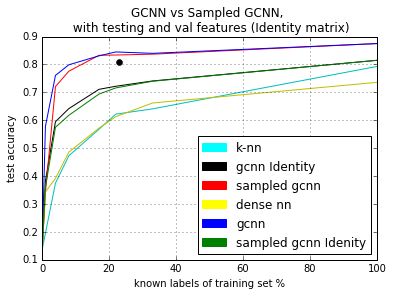

In [27]:
dict_plot = get_split_data(I_results, prefix_keys='I_')
dict_plot.update(get_split_data(results))
plot_test('GCNN vs Sampled GCNN, \n with testing and val features (Identity matrix)','GCNNvs_with_test_Identity.png',dict_plot)


{'I_gcn': {'y': [0.063999996, 0.51199967, 0.53399956, 0.59699941, 0.63499933, 0.70599914, 0.71199906, 0.73199916, 0.7459991, 0.76699907, 0.78399903, 0.80799907], 'x': [0, 1, 4, 6, 9, 14, 19, 29, 39, 50, 75, 100]}, 'I_gcn_subsampled': {'y': [0.131, 0.25400001, 0.38799995, 0.46699977, 0.44099984, 0.54199958, 0.58599943, 0.62699932, 0.66799921, 0.73499906, 0.771999, 0.80799907], 'x': [0, 1, 4, 6, 9, 14, 19, 29, 39, 50, 75, 100]}}


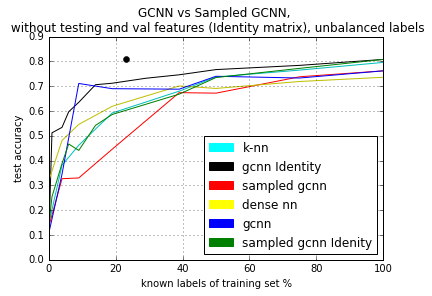

In [30]:

dict_plot = get_split_data(I_results_wo_test_random, prefix_keys='I_')
print(dict_plot)
dict_plot.update(get_split_data(results_wo_test_random))
plot_test('GCNN vs Sampled GCNN, \n without testing and val features (Identity matrix), unbalanced labels', 'GCNNvs_without_test_Identity.png',dict_plot)

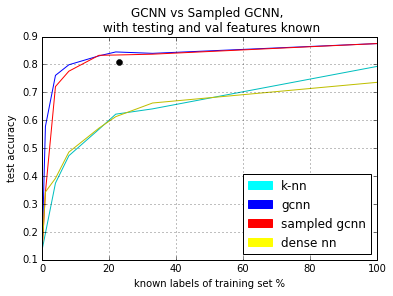

In [6]:
 
plot_test('GCNN vs Sampled GCNN, \n with testing and val features known', 'GCNNvs_with_test.png',get_split_data(results))

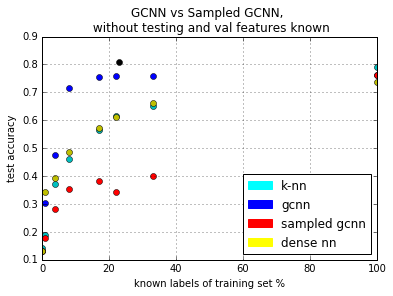

In [7]:

plot_test('GCNN vs Sampled GCNN, \n without testing and val features known', 'GCNNvs_without_test.png',get_split_data(results_wo_test),'o')


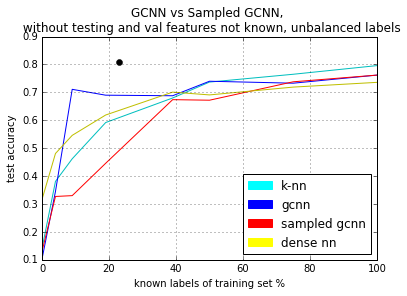

In [8]:

plot_test('GCNN vs Sampled GCNN, \n without testing and val features not known, unbalanced labels', 'GCNNvs_without_test_random.png',get_split_data(results_wo_test_random))


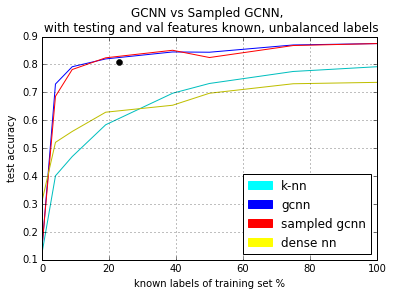

In [9]:

plot_test('GCNN vs Sampled GCNN, \n with testing and val features known, unbalanced labels', 'GCNNvs_with_random.png',get_split_data(results_random))
